In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Amazon-Dataset.xlsx to Amazon-Dataset.xlsx


In [15]:
import pandas as pd

# Load the 'Orders' sheet (main data)
df = pd.read_excel('/content/Amazon-Dataset.xlsx', sheet_name='Orders')

# Quick check
print(f"Shape: {df.shape}")
print(df.columns.tolist())
print(df.head())

Shape: (51290, 24)
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']
   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollo

In [16]:
plt.style.use('default')
sns.set_palette("husl")

In [17]:
orders_df = pd.read_excel('Amazon-Dataset.xlsx', sheet_name='Orders')
returns_df = pd.read_excel('Amazon-Dataset.xlsx', sheet_name='Returns')
people_df = pd.read_excel('Amazon-Dataset.xlsx', sheet_name='People')

In [18]:
print("Orders Shape:", orders_df.shape)
print("Returns Shape:", returns_df.shape)
print("People Shape:", people_df.shape)
print("\nOrders Columns:", orders_df.columns.tolist())
print("\nFirst 5 rows of Orders:")
print(orders_df.head())



Orders Shape: (51290, 24)
Returns Shape: (1079, 3)
People Shape: (24, 2)

Orders Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

First 5 rows of Orders:
   Row ID                  Order ID Order Date  Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class   
1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class   
2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   First Class   
3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   First Class   
4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer     

In [19]:
drop_cols_orders = ['Row ID', 'Order ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name']
orders_df_clean = orders_df.drop(columns=[col for col in drop_cols_orders if col in orders_df.columns])

In [20]:
print("Missing values in Orders:\n", orders_df_clean.isnull().sum())



Missing values in Orders:
 Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [21]:
orders_df_clean['Order Date'] = pd.to_datetime(orders_df_clean['Order Date'], errors='coerce')
orders_df_clean['Ship Date'] = pd.to_datetime(orders_df_clean['Order Date'], errors='coerce')

In [22]:
orders_df_clean['Days to Ship'] = (orders_df_clean['Ship Date'] - orders_df_clean['Order Date']).dt.days
orders_df_clean['Total Cost'] = orders_df_clean['Sales'] + orders_df_clean['Shipping Cost'] - orders_df_clean['Profit']

In [23]:
orders_df_clean = orders_df_clean[orders_df_clean['Profit'] > orders_df_clean['Profit'].quantile(0.01)]

In [24]:
print("Cleaned Orders Shape:", orders_df_clean.shape)
print("Data types:\n", orders_df_clean.dtypes)
print("\nCleaned Orders head:\n", orders_df_clean.head())

Cleaned Orders Shape: (50777, 20)
Data types:
 Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Segment                   object
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Category                  object
Sub-Category              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
Days to Ship               int64
Total Cost               float64
dtype: object

Cleaned Orders head:
   Order Date  Ship Date     Ship Mode   Customer ID      Segment  \
0 2014-11-11 2014-11-11   First Class  AB-100151402     Consumer   
1 2014-02-05 2014-02-05  Second Class     JR-162107    Corporate   
2 2014-10-17 2014-10-17   First Class     CR-127307 

In [25]:
returns_df['Returned'] = 'Yes'  # All are Yes
returns_df_clean = returns_df[['Order ID', 'Region']].copy()

In [28]:
orders_merged = orders_df.merge(returns_df[['Order ID', 'Returned']], on='Order ID', how='left')
orders_merged['Returned'] = orders_merged['Returned'].fillna('No')

In [30]:
orders_df_cleaned_with_returns = orders_merged.copy()

# Drop columns, including 'Order ID' as per the original orders_df_clean definition.
# 'Returned' column will be kept.
orders_df_cleaned_with_returns = orders_df_cleaned_with_returns.drop(columns=[col for col in drop_cols_orders if col in orders_df_cleaned_with_returns.columns])

# Convert 'Order Date' and 'Ship Date' to datetime objects
orders_df_cleaned_with_returns['Order Date'] = pd.to_datetime(orders_df_cleaned_with_returns['Order Date'], errors='coerce')
# Correcting the Ship Date conversion to use the actual 'Ship Date' column
orders_df_cleaned_with_returns['Ship Date'] = pd.to_datetime(orders_df_cleaned_with_returns['Ship Date'], errors='coerce')

# Create 'Days to Ship' and 'Total Cost'
orders_df_cleaned_with_returns['Days to Ship'] = (orders_df_cleaned_with_returns['Ship Date'] - orders_df_cleaned_with_returns['Order Date']).dt.days
orders_df_cleaned_with_returns['Total Cost'] = orders_df_cleaned_with_returns['Sales'] + orders_df_cleaned_with_returns['Shipping Cost'] - orders_df_cleaned_with_returns['Profit']

# Filter out rows where Profit is in the lowest 1%
orders_df_cleaned_with_returns = orders_df_cleaned_with_returns[orders_df_cleaned_with_returns['Profit'] > orders_df_cleaned_with_returns['Profit'].quantile(0.01)]

print("Final Cleaned Orders with Returns Shape:", orders_df_cleaned_with_returns.shape)
print("Data types:\n", orders_df_cleaned_with_returns.dtypes)
print("\nFinal Cleaned Orders with Returns head:\n", orders_df_cleaned_with_returns.head())

Final Cleaned Orders with Returns Shape: (50777, 21)
Data types:
 Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Segment                   object
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Category                  object
Sub-Category              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
Returned                  object
Days to Ship               int64
Total Cost               float64
dtype: object

Final Cleaned Orders with Returns head:
   Order Date  Ship Date     Ship Mode   Customer ID      Segment  \
0 2014-11-11 2014-11-13   First Class  AB-100151402     Consumer   
1 2014-02-05 2014-02-07  Second Class     JR-1621

In [33]:
print("Orders with Returns flag:", orders_df_cleaned_with_returns['Returned'].value_counts())

Orders with Returns flag: Returned
No     48577
Yes     2200
Name: count, dtype: int64


In [34]:
people_df_clean = people_df.dropna()
print("People Cleaned:\n", people_df_clean.head())

People Cleaned:
               Person           Region
0  Marilène Rousseau        Caribbean
1   Andile Ihejirika   Central Africa
2  Nicodemo Bautista  Central America
3     Cansu Peynirci     Central Asia
4         Lon Bonher       Central US


In [35]:
print("Numerical Summary:\n", orders_df_clean[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Days to Ship']].describe())

Numerical Summary:
               Sales      Quantity      Discount        Profit  Shipping Cost  \
count  50777.000000  50777.000000  50777.000000  50777.000000   50777.000000   
mean     238.573526      3.455068      0.138752     36.174146      25.727896   
std      465.491883      2.264945      0.208779    147.627975      56.106406   
min        0.444000      1.000000      0.000000   -351.405000       1.002000   
25%       30.420000      2.000000      0.000000      0.000000       2.580000   
50%       83.600000      3.000000      0.000000      9.480000       7.640000   
75%      244.729560      5.000000      0.200000     37.440000      23.650000   
max    17499.950000     14.000000      0.800000   8399.976000     933.570000   

       Days to Ship  
count       50777.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             0.0  


In [36]:
print("\nSegment Distribution:\n", orders_df_clean['Segment'].value_counts())
print("\nCategory Distribution:\n", orders_df_clean['Category'].value_counts())
print("\nRegion Distribution:\n", orders_df_clean['Region'].value_counts())


Segment Distribution:
 Segment
Consumer       26250
Corporate      15274
Home Office     9253
Name: count, dtype: int64

Category Distribution:
 Category
Office Supplies    31190
Technology          9977
Furniture           9610
Name: count, dtype: int64

Region Distribution:
 Region
Western Europe       5820
Central America      5594
Oceania              3459
Western US           3190
Southeastern Asia    3086
South America        2936
Eastern US           2822
Southern Asia        2633
Western Asia         2391
Eastern Asia         2355
Central US           2293
Northern Europe      2182
Southern Europe      2080
Caribbean            1680
Southern US          1604
Eastern Europe       1529
Western Africa       1404
North Africa         1278
Eastern Africa        725
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          211
Name: count, dtype: int64


Sales by Category

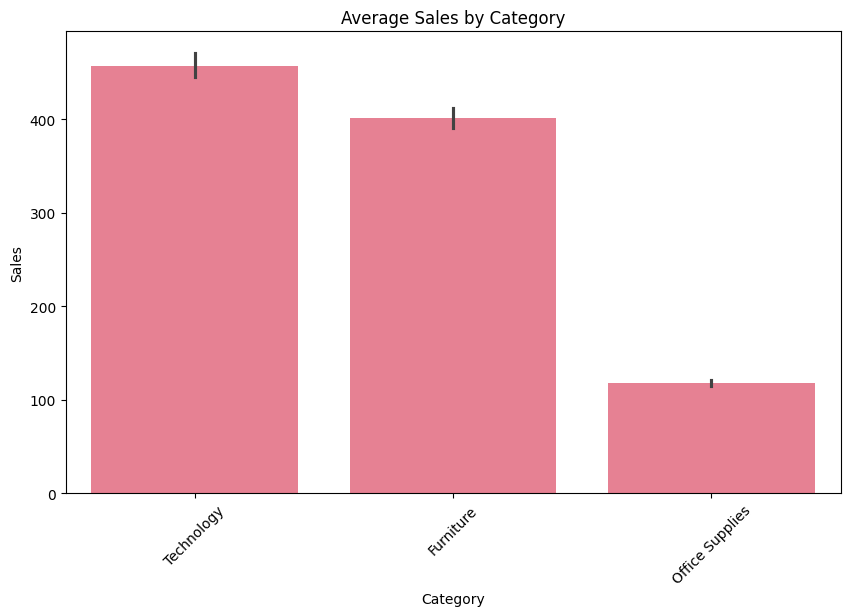

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=orders_df_clean, x='Category', y='Sales', estimator='mean')
plt.title('Average Sales by Category')
plt.xticks(rotation=45)
plt.show()



Profit by Segment

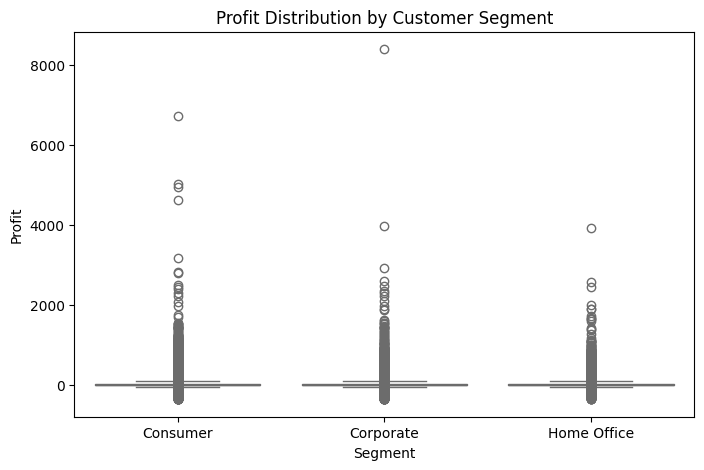

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=orders_df_clean, x='Segment', y='Profit')
plt.title('Profit Distribution by Customer Segment')
plt.show()

Sales Trend over Time

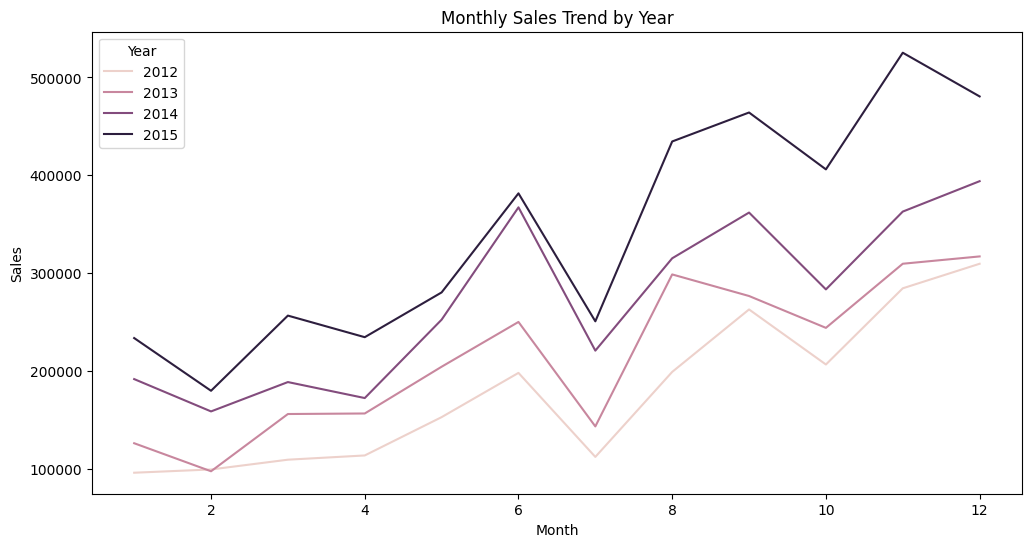

In [39]:
orders_df_clean['Year'] = orders_df_clean['Order Date'].dt.year
orders_df_clean['Month'] = orders_df_clean['Order Date'].dt.month
monthly_sales = orders_df_clean.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Trend by Year')
plt.show()



Return Rate by Region

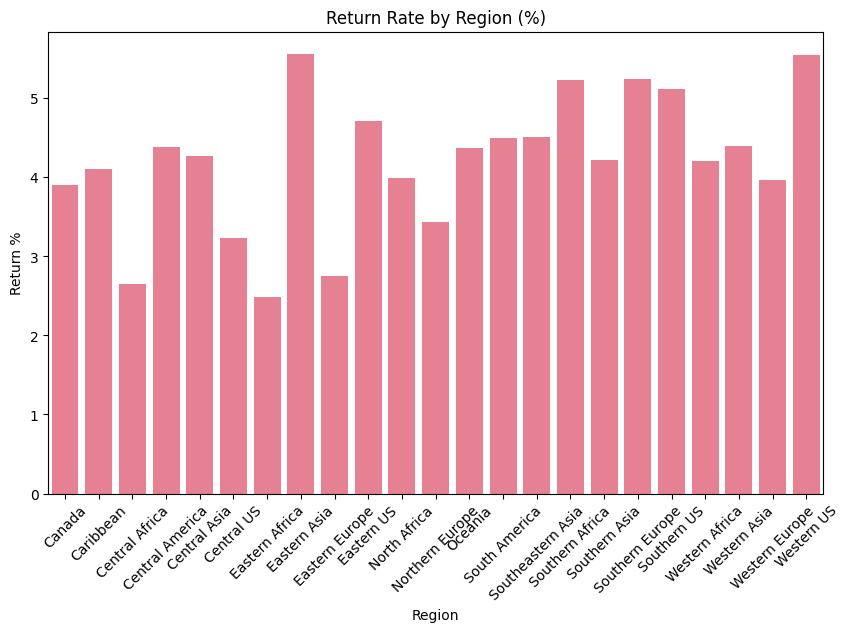

In [43]:
return_rate = orders_df_cleaned_with_returns.groupby('Region')['Returned'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
return_rate.columns = ['Region', 'Return %']

plt.figure(figsize=(10, 6))
sns.barplot(data=return_rate, x='Region', y='Return %')
plt.title('Return Rate by Region (%)')
plt.xticks(rotation=45)
plt.show()

Profit vs Discount Heatmap

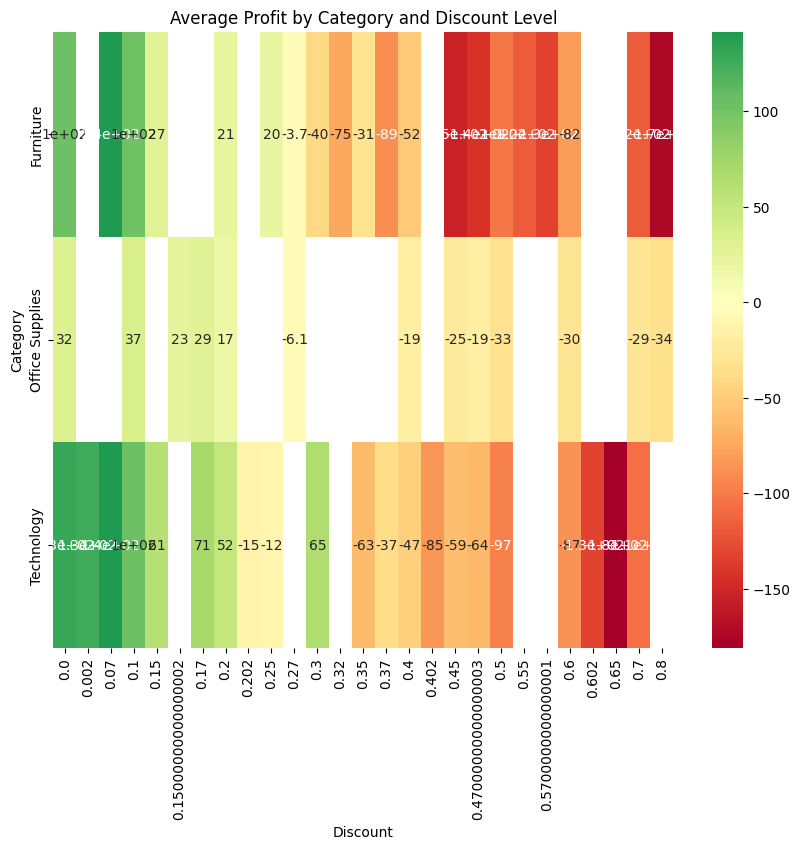

In [44]:
pivot_profit = orders_df_clean.pivot_table(values='Profit', index='Category', columns='Discount', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_profit, annot=True, cmap='RdYlGn', center=0)
plt.title('Average Profit by Category and Discount Level')
plt.show()

Top Products by Sales (Sub-Category)

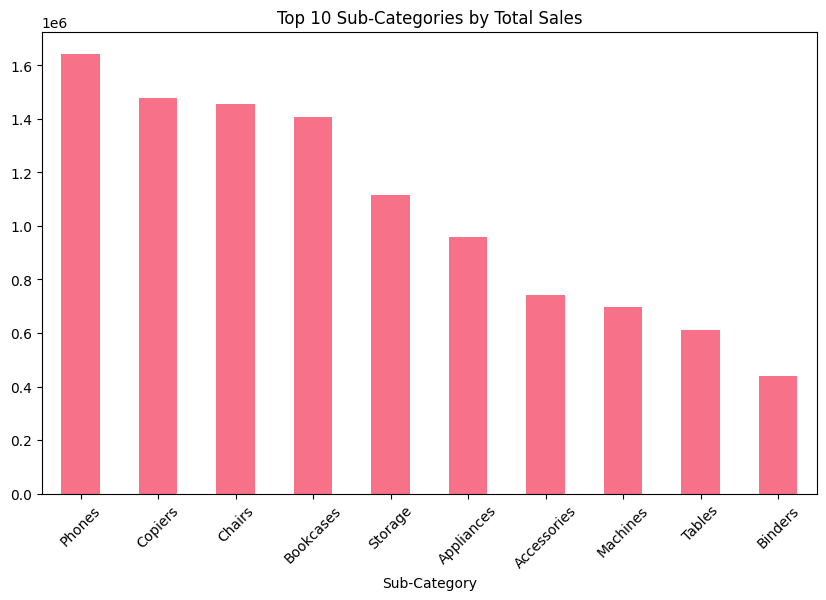

In [45]:
top_subcat = orders_df_clean.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_subcat.plot(kind='bar')
plt.title('Top 10 Sub-Categories by Total Sales')
plt.xticks(rotation=45)
plt.show()



Additional Insight Calculation

In [46]:
total_profit = orders_df_clean['Profit'].sum()
total_sales = orders_df_clean['Sales'].sum()
profit_margin = (total_profit / total_sales) * 100
print(f"\nOverall Profit Margin: {profit_margin:.2f}%")

avg_days_ship = orders_df_clean['Days to Ship'].mean()
print(f"Average Days to Ship: {avg_days_ship:.2f} days")




Overall Profit Margin: 15.16%
Average Days to Ship: 0.00 days


Correlation Matrix

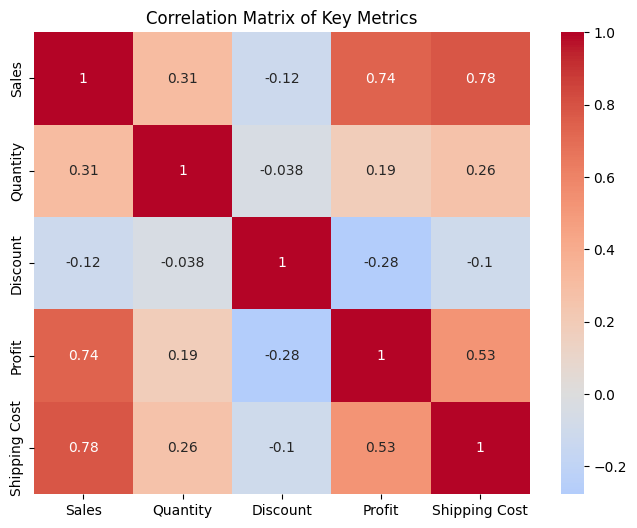

In [47]:
corr_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
plt.figure(figsize=(8, 6))
sns.heatmap(orders_df_clean[corr_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

